In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np

import os


import matplotlib as mpl
mpl.rcParams['font.serif'] = "Bitstream Vera Serif"
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['font.size'] = 18

from matplotlib.gridspec import GridSpec

In [3]:
def flatten_and_mask_shots(shots, mask,):
    num_shots = shots.shape[0]
    size = shots.shape[1]*shots.shape[2]
    flat_mask = mask.reshape(size)
    flat_shots =  shots.reshape( (num_shots,size))*flat_mask
    
    return flat_shots[:,flat_mask]

def unflatten_shots(flat_shots,mask):
    num_shots = flat_shots.shape[0]
    shape = mask.shape
    flat_mask = mask.reshape(shape[0]*shape[1]
                            )
    shots = np.zeros( (num_shots,shape[0]*shape[1]), dtype = flat_shots.dtype)
    shots[:, flat_mask ] = flat_shots
    
    return shots.reshape( (num_shots,shape[0],shape[1]))

def diff(a,b):
    return (a/a.mean())/(b/b.mean())-1

In [4]:
ave_int_dir = '/reg/d/psdm/cxi/cxilr6716/results/flatfield_calibration/ave_int_statisitcs'
run = 115
f = h5py.File(os.path.join(ave_int_dir,'run%d_ave_int.h5'%run))
print f.keys()

f_mask = h5py.File('/reg/d/psdm/cxi/cxilr6716/results/masks/run%d_masks.h5'%run,'r')
mask=f_mask['mask'].value

[u'ave_flat_shots', u'ave_flat_shots_err', u'bin_centers', u'bin_delta', u'num_shots_per_bin']


In [5]:
treshold = 50
shots = f['ave_flat_shots'].value
mean_int = shots.mean(-1)

n_shots = f['num_shots_per_bin'].value
select=n_shots>treshold

g_n = mean_int[select,None]/shots[select]
mean_int = mean_int[select]

shots=shots[select]
n_shots=n_shots[select]


In [41]:
ref_shot=shots[10]
shot1=shots[6]
shot2=shots[20]

diff1 = diff(shot1,ref_shot)
diff2 = diff(shot2,ref_shot)

print mean_int[10],mean_int[6],mean_int[20]
print n_shots[10],n_shots[6],n_shots[20]

21.4703981632 17.5675727622 31.5065217529
235 128 548


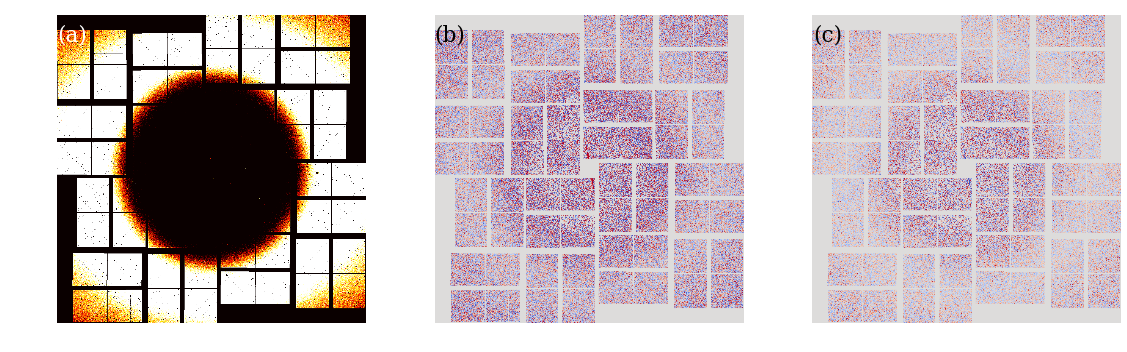

In [26]:

plt.figure(figsize=[16,8])

ax=plt.subplot(131)
plt.imshow( unflatten_shots(ref_shot[None,:],mask)[0]*mask, 
         aspect=1, cmap='hot',vmin=12,vmax=20)
ax.set_title('(a)', x= 0.05,y =0.9, color='White')
ax.set_axis_off()

scale=[-0.25,0.25]
ax=plt.subplot(132)

plt.imshow( unflatten_shots(diff1[None,:],mask)[0]*mask, 
         aspect=1, cmap='coolwarm',vmin=scale[0],vmax=scale[1])
ax.set_title('(b)', x= 0.05,y =0.9, color='black')

ax.set_axis_off()



ax=plt.subplot(133)

plt.imshow( unflatten_shots(diff2[None,:],mask)[0]*mask, 
         aspect=1, cmap='coolwarm',
          vmin=scale[0],vmax=scale[1])
ax.set_title('(c)', x= 0.05,y =0.9, color='black')

ax.set_axis_off()

plt.tight_layout()

# plt.colorbar()
# plt.savefig('copper_not_flat.png',bbox_in_inches='tight')

(array([  4.70000000e+01,   1.05000000e+02,   2.38000000e+02,
          5.76000000e+02,   1.41800000e+03,   3.11700000e+03,
          6.00200000e+03,   1.18180000e+04,   2.25930000e+04,
          4.48810000e+04,   8.70210000e+04,   1.56949000e+05,
          2.37601000e+05,   2.99599000e+05,   3.13900000e+05,
          2.76925000e+05,   2.12196000e+05,   1.45954000e+05,
          9.38140000e+04,   5.79900000e+04,   3.59330000e+04,
          2.24170000e+04,   1.49340000e+04,   1.00310000e+04,
          6.97900000e+03,   4.94300000e+03,   3.51600000e+03,
          2.65400000e+03,   1.97400000e+03]),
 array([-0.5       , -0.46551724, -0.43103448, -0.39655172, -0.36206897,
        -0.32758621, -0.29310345, -0.25862069, -0.22413793, -0.18965517,
        -0.15517241, -0.12068966, -0.0862069 , -0.05172414, -0.01724138,
         0.01724138,  0.05172414,  0.0862069 ,  0.12068966,  0.15517241,
         0.18965517,  0.22413793,  0.25862069,  0.29310345,  0.32758621,
         0.36206897,  0.3965517

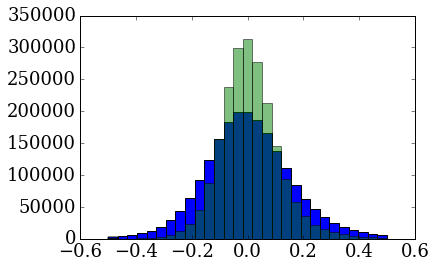

In [27]:
bins=np.linspace(-0.5,0.5,30)
plt.hist(diff1,bins=bins)
plt.hist(diff2,bins=bins, alpha=0.5)

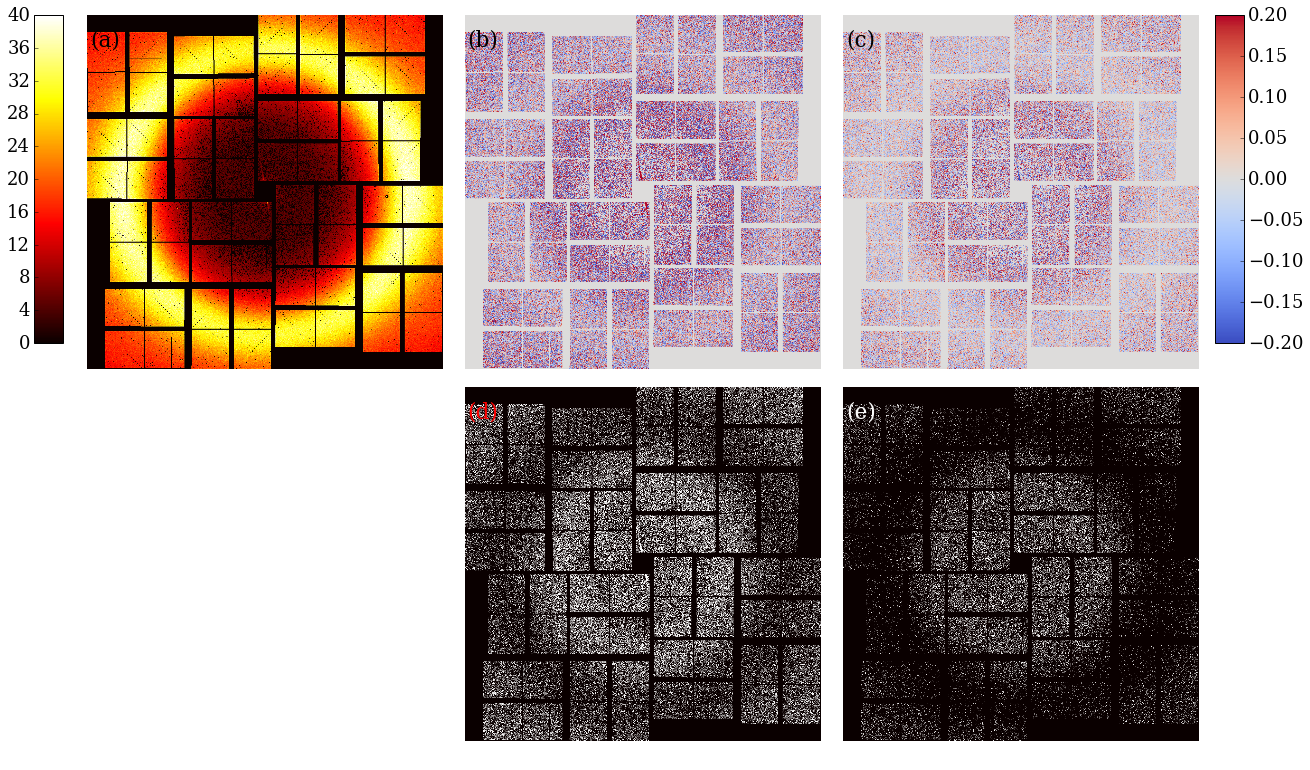

In [40]:

fig = plt.figure(figsize=[20,13])
gs=GridSpec(2,3)
gs.update(wspace=0.05,hspace=0.05)
scale=[-0.2,0.2]

###ref shot
ax=plt.subplot(gs[0,0])
im=plt.imshow( unflatten_shots(ref_shot[None,:],mask)[0]*mask, 
         aspect=1, cmap='hot',vmin=0,vmax=40)
ax.set_title('(a)', x= 0.05,y =0.9, color='black')
ax.set_axis_off()

# fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.09, 0.55, 0.02, 0.35])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.yaxis.set_ticks_position('left')

##diff1
ax=plt.subplot(gs[0,1])

plt.imshow( unflatten_shots(diff1[None,:],mask)[0]*mask, 
         aspect=1, cmap='coolwarm',vmin=scale[0],vmax=scale[1])
ax.set_title('(b)', x= 0.05,y =0.9, color='black')

ax.set_axis_off()
# plt.colorbar()

##diff2
ax=plt.subplot(gs[0,2])

im=plt.imshow( unflatten_shots(diff2[None,:],mask)[0]*mask, 
         aspect=1, cmap='coolwarm',
          vmin=scale[0],vmax=scale[1])
ax.set_title('(c)', x= 0.05,y =0.9, color='black')

ax.set_axis_off()

# fig.subplots_adjust(left=0.8)
cbar_ax = fig.add_axes([0.91, 0.55, 0.02, 0.35])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.yaxis.set_ticks_position('right')

###big mask1
treshold=0.15
ax=plt.subplot(gs[1,1])

plt.imshow( unflatten_shots(np.abs(diff1[None,:])>treshold,mask)[0]*mask, 
         aspect=1, cmap='hot',vmin=0,vmax=1)
ax.set_title('(d)', x= 0.05,y =0.9, color='white')

ax.set_axis_off()


##big_mask2
ax=plt.subplot(gs[1,2])

plt.imshow( unflatten_shots(np.abs(diff2[None,:])>treshold,mask)[0]*mask, 
         aspect=1, cmap='hot',
          vmin=0,vmax=1)
ax.set_title('(e)', x= 0.05,y =0.9, color='white')

ax.set_axis_off()

# plt.tight_layout()

# plt.colorbar()
# plt.savefig('protein_not_flat.png',bbox_in_inches='tight')

In [79]:
diff2.std()

2.7262399503917747